<a id="start"></a>
## Исследование данных о российском кинопрокате.


Заказчик исследования — Министерство культуры Российской Федерации.

Нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделить внимание фильмам, которые получили государственную поддержку. Попробовать ответить на вопрос, насколько такие фильмы интересны зрителю.

Мы будем работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

1. [Исследование данных о российском кинопрокате](#start)
    * [Откройте файлы с данными и объедините их в один датафрейм](#start2)
    * [Предобработка данных](#preprocessing)
    * [Изучите пропуски в датафрейме](#null)
    * [Изучите дубликаты в датафрейме](#dupl)
    * [Изучите категориальные значения](#category)
    * [Проверьте количественные значения](#quantity)
    * [Добавьте новые столбцы](#newcolumns)
    * [Проведите исследовательский анализ данных](#analys)
    * [Вывод](#conclusion1)
2. [Исследуйте фильмы, которые получили государственную поддержку](#support)
    * [Oбщий вывод](#conclusion2)


 <a id="start2"></a>
### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм.  





Импортируем библиотеки и настроим окружение

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format

Откроем два файла и запишем их в переменные

In [2]:
shows = pd.read_csv('/datasets/mkrf_shows.csv')
shows.head()

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


In [3]:
movies = pd.read_csv('/datasets/mkrf_movies.csv')
movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер"


Обозначения столбцов
- title — название фильма;
- puNumber — номер прокатного удостоверения;
- show_start_date — дата премьеры фильма;
- type — тип фильма;
- film_studio — студия-производитель;
- production_country — страна-производитель;
- director — режиссёр;
- producer — продюсер;
- age_restriction — возрастная категория;
- refundable_support — объём возвратных средств государственной поддержки;
- nonrefundable_support — объём невозвратных средств государственной поддержки;
- financing_source — источник государственного финансирования;
- budget — общий бюджет фильма;
- ratings — рейтинг фильма на КиноПоиске;
- genres — жанр фильма,
- box_office — сборы в рублях.

Обратить внимание, что столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.

<a id="preprocessing"></a>
### Шаг 2. Предобработка данных 

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

Вызовем info и посмотрим типы столбцов

In [4]:
display(shows.info())
display(movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
puNumber      3158 non-null int64
box_office    3158 non-null float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
dtypes: float64(3), object(12)
memory usage: 877.4+ KB


None

Далее мы пробуем объеденить два датафрейма, но из-за разницы типов столбцов пока сделать это не получится. Обнаруживаем, что в столбце с номером прокатного удостоверения есть одно выбивающееся значение, мешающее заменить тип данных - "нет". Исключим его и из таблицы методом query, обновим индесы и заменим тип для дальнейшего объединения таблиц.

In [5]:
movies = movies.query('puNumber != "нет"').reset_index(drop=True)
movies.puNumber = movies.puNumber.astype('int')

In [6]:
df = movies.merge(shows, how ='left')
df

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.2,"боевик,драма,мелодрама",nan
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.6,"драма,военный",nan
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер",nan
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер",nan
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер",nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7480,Сад художника: Американский импрессионизм,126008019,2019-12-23T12:00:00.000Z,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,NaN,NaN,nan
7481,Звериная ярость,121037819,2019-12-24T12:00:00.000Z,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,5.4,"боевик,триллер",nan
7482,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28T12:00:00.000Z,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,NaN,NaN,nan
7483,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,NaN,NaN,nan


Проверим, что таблицы объединились, вызовем метод info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
title                    7485 non-null object
puNumber                 7485 non-null int64
show_start_date          7485 non-null object
type                     7485 non-null object
film_studio              7467 non-null object
production_country       7483 non-null object
director                 7476 non-null object
producer                 6917 non-null object
age_restriction          7485 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: float64(4), int64(1), object(11)
memory usage: 994.1+ KB


Заменим тип данных в столбце с датой

In [8]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format ='%Y-%m-%dT%H:%M:%S.000Z')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
title                    7485 non-null object
puNumber                 7485 non-null int64
show_start_date          7485 non-null datetime64[ns]
type                     7485 non-null object
film_studio              7467 non-null object
production_country       7483 non-null object
director                 7476 non-null object
producer                 6917 non-null object
age_restriction          7485 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1), object(10)
memory usage: 994.1+ KB


Для дальнейшей удобной работы со столбцом с возрастным ограничением создадим новый столбец age_id, для этого создадим функцию, определяющую возраст и категорию, применим ее к столбцу с возрастным ограничением

In [10]:
def age_categorize(age_restriction):
    if age_restriction == '«16+» - для детей старше 16 лет':
        return '16'
    elif age_restriction == '«18+» - запрещено для детей':
        return '18'
    elif age_restriction == '«12+» - для детей старше 12 лет':
        return '12'
    elif age_restriction == '«0+» - для любой зрительской аудитории':
        return '0'
    elif age_restriction == '«6+» - для детей старше 6 лет':
        return '6'
    return 'Ошибка'

Проверим, что функция, работает корректно

In [11]:
display(age_categorize('«16+» - для детей старше 16 лет'))
display(age_categorize('16+» - для детей старше 16 лет'))

'16'

'Ошибка'

In [12]:
df['age_id'] = df['age_restriction'].apply(age_categorize)

In [13]:
df['age_id'].value_counts()

16    2851
18    1605
12    1592
0      811
6      626
Name: age_id, dtype: int64

В столбце с рейтингом фильмов имеются значения от 0 до 10, и значения в процентах, возможно имеет место техническая ошибка и 99% на самом деле 9.9

In [14]:
df.query('ratings == "99%"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,age_id
259,Прошлое,221030715,2015-07-29 12:00:00,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...",Аргентина - Бразилия,Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,99%,"ужасы,триллер,драма",nan,16
1341,Сказка о добре и Вре,111008913,2013-11-15 12:00:00,Художественный,"НП ""Студия игрового кино ""Лик""",Россия,Е.Шиляева,К.Терещенко,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,99%,"триллер,драма,детектив",nan,6
1804,Спираль.,111001014,2014-01-30 12:00:00,Художественный,"ООО ""Компания Питон""",Россия,А.Волгин,Е.Ковалева,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,99%,"аниме,мультфильм,ужасы","4,295.00",12
6881,Животные рядом со Святыми,112003719,2019-05-03 12:00:00,Документальный,"ООО ""Кинопрограмма ""XXI век""",Россия,Т.Мирошник,"В.Есинов, Е.Калинина",«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,99%,"криминал,драма",nan,0


Четыре фильма с оценкой 9.9, ужасы, триллер, аниме и криминал, не очень популярные фильмы, не похоже, что бы они были с такой высокой оценкой. Найдем фильм в таблице с самым высоким рейтингом "Побег из Шоушенка" (по данным Кинопоиска второе место по рейтингу фильмов)

In [15]:
df.query('title == "Побег из Шоушенка"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,age_id
7301,Побег из Шоушенка,121029519,2019-10-18 12:00:00,Художественный,"Уорнер Броз. Пикчерз, Кастл Рок Интертейнмент",США,Фрэнк Дарабонт,"Лиз Глоцер, Дэвид В.Лестер, Ники Марвин",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,9.1,драма,nan,16


Рейтинг 9.1. 
Значит проценты в таблице обозначают что-то другое или это просто техническая ошибка. Применим метод to_numeric, чтобы преобразовать все значения столбца в числовой вид, параметром errors принудительно заменим все пропуски на nan

In [16]:
df['ratings'] = pd.to_numeric(df['ratings'],errors ='coerce')
df = df.reset_index(drop=True)
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,age_id
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.20,"боевик,драма,мелодрама",nan,18
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.60,"драма,военный",nan,6
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,18
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,18
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,18


Теперь мы можем заменить тип столбца

In [17]:
df['age_id'] = df['age_id'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7485 entries, 0 to 7484
Data columns (total 17 columns):
title                    7485 non-null object
puNumber                 7485 non-null int64
show_start_date          7485 non-null datetime64[ns]
type                     7485 non-null object
film_studio              7467 non-null object
production_country       7483 non-null object
director                 7476 non-null object
producer                 6917 non-null object
age_restriction          7485 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6490 non-null float64
genres                   6510 non-null object
box_office               3158 non-null float64
age_id                   7485 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1), object(9)
memory usage: 994.2+ KB


<a id="null"></a>
#### Шаг 2.2. Изучите пропуски в датафрейме 

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

Найдем пропуски в таблице и подумаем, что можно заполнить

In [18]:
df.isnull().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   995
genres                    975
box_office               4327
age_id                      0
dtype: int64

Заполним пропуски в столбце с режиссерами и жанрами:

In [19]:
df['director'] = df['director'].fillna('Неизвестно')
df['genres'] = df['genres'].fillna('Неизвестно')
df['producer'] = df['producer'].fillna('Неизвестно')
df['film_studio'] = df['film_studio'].fillna('Неизвестно')

Так как в столбце со страной-производителем всего два пропуска, можно посмотреть, что это за фильмы и по возможности заполнить их подходящим значением. Для этого в новую переменную запишем значения таблицы отвечающие фильтру, что значение отсутсвует. 

In [20]:
isnull = df.isnull().query('production_country == True')
isnull

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,age_id
3185,False,False,False,False,False,True,False,False,False,True,True,True,True,False,False,False,False
4440,False,False,False,False,False,True,False,False,False,True,True,True,True,False,False,True,False


In [21]:
display(df.loc[3185])
display(df.loc[4440])

title                    Детский юмористический киножурнал "Ералаш. Ну ...
puNumber                                                         111001216
show_start_date                                        2016-02-09 12:00:00
type                                                        Художественный
film_studio                                ООО "Продюсерский центр ЕРАЛАШ"
production_country                                                     NaN
director                 Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...
producer                                   ООО "Продюсерский центр ЕРАЛАШ"
age_restriction                     «0+» - для любой зрительской аудитории
refundable_support                                                     NaN
nonrefundable_support                                                  NaN
budget                                                                 NaN
financing_source                                                       NaN
ratings                  

title                                  Мульт личности. Выпуск 5
puNumber                                              214000410
show_start_date                             2010-01-25 12:00:00
type                                             Художественный
film_studio                                          Неизвестно
production_country                                          NaN
director                                             Неизвестно
producer                                             Неизвестно
age_restriction          «0+» - для любой зрительской аудитории
refundable_support                                          NaN
nonrefundable_support                                       NaN
budget                                                      NaN
financing_source                                            NaN
ratings                                                    4.00
genres                                       мультфильм,комедия
box_office                              

"Ералаш" и "Мульт личности". Обе телепередачи российского производства. Заполним пропусками значением "Россия". Уточним, что данный способ подойдет только для случая, если значений очень немного, если пропусков будет на порядок больше, логичнее их заменить на универсальное "Неизвестно".

In [22]:
df['production_country'] = df['production_country'].fillna('Россия')

Снова посмотрим на количество пропусков, все ли заполнилось, что должно было

In [23]:
df.isnull().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   995
genres                      0
box_office               4327
age_id                      0
dtype: int64

В столбцах с пропусками есть категориальные значения: источник финансирования. Его заполнение невозможно, так как замена пропусков на любое значение исказит данные.

Столбцы с информацией о финансировании оставим без изменения, данных мало, даже посчитав среднее, заполнив им пустые значения мы скорее всего получим "абракадабру".

С пропусками в столбцах с рейтингом и сборах можно поступить следующим образом: посчитать среднее и заполнить им пропуски, но тогда мы получим недостоверную картину данных. На самом деле у фильма возможно оценка и сборы будут намного выше или ниже среднего, а мы присвоим им совсем другие значения, такое заполнение сильно исказит результат исследования. Логичнее оставить их в первоначальном виде.

Пропушенных значений в столбце студией-производителем также можно заполнить на "Неизвестно".
Два пропуска в столбце со страной-производителем заполнили подходящими им значениями.

<a id="dupl"></a>
#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

Проверим есть ли в данных дубликаты по строкам

In [24]:
df.duplicated().sum()

0

Теперь проверим дубли по столбцам

In [25]:
df['puNumber'].duplicated().sum()

2

In [26]:
df['title'].duplicated().sum()

714

Возможные причины появления дубликатов:
- технический сбой, программа по учету прокатных удостоверений дала сбой и задвоила данные,
- данные просто неправильно подгрузились,
- из-за объединения в самом начале двух таблиц, в каждой был столбец с номером прокатного удостоверения, возможно для одного и того же фильма у них были чуть разные строки, отсюда и дубли.

В столбце с номером прокатного удостоверения два дубликата, а в столбце с названием 714. С помощью ключа посмотрим какие фильмы и в каком количестве дублируются

In [27]:
key = 'title'
df.fillna(-999).groupby(key)['title'].count().sort_values(ascending=False).head()

title
День святого Валентина_                             5
Секс в большом городе 2                             4
Не брать живым /По книге Раджива Чандрасекарана/    4
Кошки против собак: Месть Китти Галор               4
Дорога /По новелле Кормака МкКарфи/                 4
Name: title, dtype: int64

In [28]:
df = df.drop_duplicates(subset=key).reset_index(drop=True)
df

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,age_id
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.20,"боевик,драма,мелодрама",nan,18.00
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Неизвестно,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.60,"драма,военный",nan,6.00
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,18.00
3,Остановился поезд,111013816,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,Неизвестно,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,7.70,драма,nan,6.00
4,Любовь и голуби,111007013,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,Неизвестно,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,8.30,"мелодрама,комедия","2,700.00",12.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6766,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,nan,Неизвестно,nan,12.00
6767,Звериная ярость,121037819,2019-12-24 12:00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,5.40,"боевик,триллер",nan,16.00
6768,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,nan,Неизвестно,nan,0.00
6769,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,nan,Неизвестно,nan,0.00


Заново посмотрим количество дублей

In [29]:
display(df['title'].duplicated().sum())
display(df['puNumber'].duplicated().sum())

0

0

<a id="category"></a>
#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.



Посмотрим данные из категориальных столбцов и определим какая у них общая проблема

In [30]:
display(df['genres'].value_counts())
display(df['production_country'].value_counts())
display(df['financing_source'].value_counts())

Неизвестно                       966
драма                            448
комедия                          329
мелодрама,комедия                181
драма,мелодрама                  170
                                ... 
фантастика,драма,криминал          1
мультфильм,семейный,драма          1
фэнтези,боевик,детектив            1
фантастика,боевик,мелодрама        1
комедия,мультфильм,фантастика      1
Name: genres, Length: 743, dtype: int64

Россия                                                            1795
США                                                               1775
СССР                                                               345
Франция                                                            278
Великобритания                                                     240
                                                                  ... 
Франция - Бельгия - Великобритания - США - Нидерланды - Канада       1
СССР, Румыния, Франция                                               1
США - Канада - Япония - КНР                                          1
Германия - Нидерланды - Беларусь - Россия - Латвия                   1
Италия - Фрация - Бразилия - Германия                                1
Name: production_country, Length: 943, dtype: int64

Министерство культуры               163
Фонд кино                           144
Министерство культуры, Фонд кино     22
Name: financing_source, dtype: int64

Проблемой можно назвать то, что например в столбце с жанром есть жанр "драма" и есть жанр "драма,мелодрама". Получается, что данные задваиваются. Такая же ситуация со странами и источником финансирования. 

Посмотрим на значения в столбце type

In [31]:
df.type.value_counts()

Художественный                3929
 Художественный               1350
Анимационный                   766
Прочие                         390
Документальный                 282
Научно-популярный               52
 Анимационный                    1
Музыкально-развлекательный       1
Name: type, dtype: int64

В данных имеются одинаковые значения с разным количеством пробелов, исправим это методом str.strip 

In [32]:
df['type'] = df['type'].str.strip()

In [33]:
df['type'].value_counts()

Художественный                5279
Анимационный                   767
Прочие                         390
Документальный                 282
Научно-популярный               52
Музыкально-развлекательный       1
Name: type, dtype: int64

<a id="quantity"></a>
#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?



Изучим столбцы с финансированием фильмов и бюджет.Построим графики для наглядности

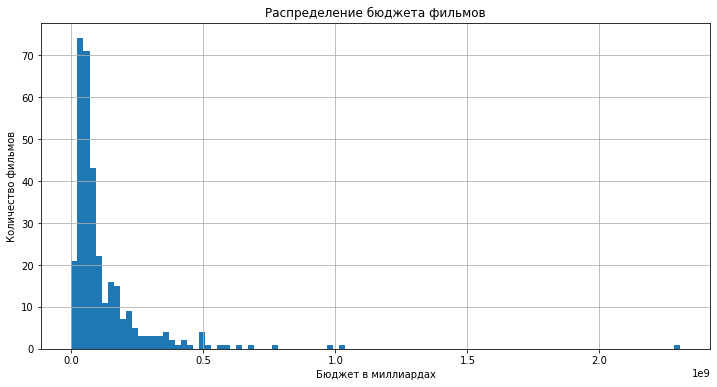

In [34]:
df['budget'].hist(bins=100,figsize=(12,6)) 

plt.title('Распределение бюджета фильмов')

plt.xlabel('Бюджет в миллиардах')

plt.ylabel('Количество фильмов')

plt.show();

На графике есть выбивающееся значение, больше 2 миллиардов рублей, посмотрим, что это за фильм:

In [35]:
df.query('budget > 2000000000')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,age_id
6418,Тайна Печати Дракона,111012819,2019-09-12 12:00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...",Россия-Китай,О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,"180,000,000.00","90,000,000.00","2,305,074,303.00",Фонд кино,5.80,"приключения,фэнтези","333,597,059.59",6.00


Фильм один, на общий бюджет в 2,3 миллиарда рублей фильм собрал в прокате всего 333 с лишним миллиона. Скорее всего из общей таблицы этот фильм придется исключить, так как он может сильно исказить данные при анализе

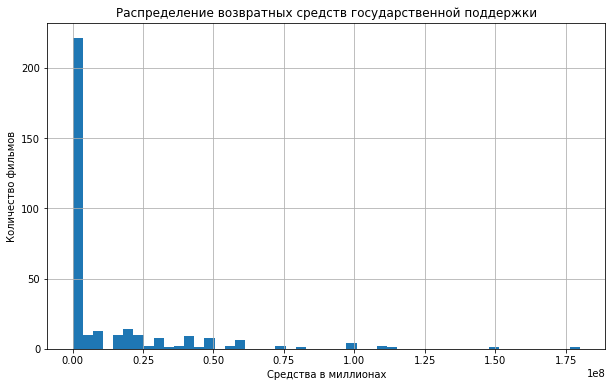

In [36]:
df['refundable_support'].hist(bins=50,figsize=(10,6))
plt.title('Распределение возвратных средств государственной поддержки')

plt.xlabel('Средства в миллионах')

plt.ylabel('Количество фильмов')

plt.show() ;

In [37]:
# выведем фильмы с невозвратной суммой поддежки государтсва более 1.4 миллионов рублей
df.query('refundable_support > 140000000')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,age_id
3066,Дуэлянт,111015416,2016-09-14 12:00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,А.Мизгирев,"А.Роднянский, С.Мелькумов",«16+» - для детей старше 16 лет,"150,000,000.00","300,000,000.00","684,200,536.00",Фонд кино,6.60,драма,"364,285,139.60",16.00
6418,Тайна Печати Дракона,111012819,2019-09-12 12:00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...",Россия-Китай,О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,"180,000,000.00","90,000,000.00","2,305,074,303.00",Фонд кино,5.80,"приключения,фэнтези","333,597,059.59",6.00


Два фильма, с самой большой суммой возвратной поддержки, однако "Дуэлянт" с бюджетом в 3 раза меньше, чем у "Тайна Печати Дракона" в прокате собрал даже чуть больше, его мы оставим, а вот с драконами все-таки попрощаемся.

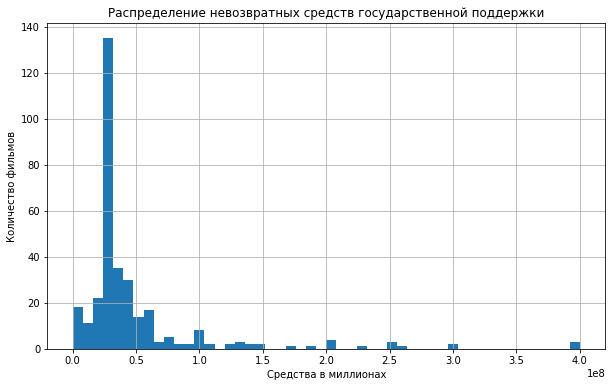

In [38]:
df['nonrefundable_support'].hist(bins=50,figsize=(10,6))

plt.title('Распределение невозвратных средств государственной поддержки')

plt.xlabel('Средства в миллионах')

plt.ylabel('Количество фильмов')

plt.show() ;

In [39]:
df.query('nonrefundable_support > 350000000')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,age_id
2668,Экипаж .,111005416,2016-03-21 12:00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,Н.Лебедев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,"50,000,000.00","392,104,482.00","635,283,867.00",Фонд кино,7.60,"драма,триллер,приключения","1,402,255,390.00",6.00
4993,Движение вверх,111011817,2017-12-21 12:00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.00,"400,000,000.00","590,192,191.00",Фонд кино,7.50,"спорт,драма","2,779,686,144.00",6.00
6750,Союз спасения,111022019,2019-12-26 12:00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,"100,000,000.00","400,000,000.00","980,000,000.00",Фонд кино,6.00,"история,биография,драма","717,703,185.53",12.00


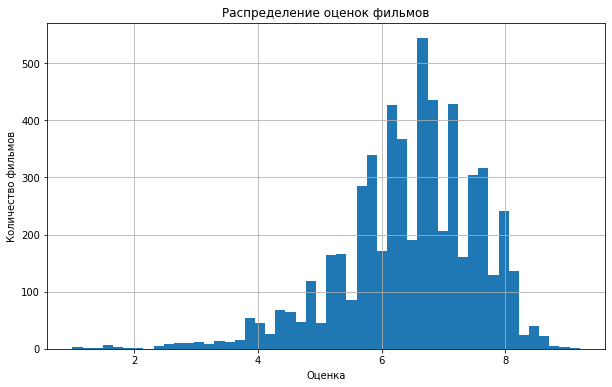

In [40]:
df['ratings'].hist(bins=50,figsize=(10,6))

plt.title('Распределение оценок фильмов')

plt.xlabel('Оценка')

plt.ylabel('Количество фильмов')

plt.show() ;

In [41]:
df.query('ratings < 2')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,age_id
484,Ночь в супермаркете,124001212,2012-05-02 12:00:00,Анимационный,"Си 47 Продакшнз, Лайнс Гейт Фэмили Интертейнме...",США,Лоуренс Казанофф,"Джордж Джонсен, Лоуренс Казанофф, Элисон Сэвич...",«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,1.60,"мультфильм,комедия,семейный",620.00,0.00
934,Большая Ржака,111003512,2012-07-23 12:00:00,Художественный,"ООО ""Авеста филмс""",Россия,В.Москаленко,"Р.Арзуманов, В.Малый",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,1.40,комедия,"87,795.00",16.00
1112,Зомби каникулы,111001213,2013-03-29 12:00:00,Художественный,"ООО Студия ""Новая волна""",Россия,К.Кемниц,С.Торчилин,«18+» - запрещено для детей,nan,nan,nan,NaN,1.50,"ужасы,триллер,комедия",nan,18.00
1334,Черная роза,111004014,2014-04-16 12:00:00,Художественный,"ООО ""Кинокомпания Царь"", Hollywood Storm",Россия,А.Невский,А.Невский,«16+» - для детей старше 16 лет,nan,nan,nan,NaN,1.50,"детектив,триллер,криминал",380.00,16.00
1338,Джастин Бибер: Believe,126003716,2016-06-07 12:00:00,Прочие,"Дольфин Филмз, Бибер Тайм Филмз, Скутер Браун ...",США,Джон М.Чу,"Джастин Бибер, Скутер Браун, Стюарт Форд",«6+» - для детей старше 6 лет,nan,nan,nan,NaN,1.60,"концерт,музыка,документальный",nan,6.00
1394,Кавказ.,111009413,2013-11-26 12:00:00,Художественный,"Юнайтед Мультимедиа Проджектс, Метрополь",Азербайджан-Россия,Фарид Гумбатов,"Рауф Атамалибеков, Фарид Гумбатов",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,1.10,комедия,nan,16.00
1535,7 главных желаний,111009113,2013-11-19 12:00:00,Художественный,"ООО ТПО ""РОК""",Россия,В.Соколовский,"А.Учитель, К.Саксаганская",«12+» - для детей старше 12 лет,nan,nan,nan,NaN,1.60,"мелодрама,комедия","6,380.00",12.00
3089,Дизлайк,111012516,2016-08-05 12:00:00,Художественный,"ООО ""Ангел""",Россия,П.Руминов,"П.Руминов, И.Капитонов",«18+» - запрещено для детей,nan,nan,nan,NaN,1.50,ужасы,"11,066,749.18",18.00
3228,Взломать блогеров,111016616,2016-10-28 12:00:00,Художественный,"ООО ""ТаББаК""",Россия,М.Свешников,Т.Бекмамбетов,«6+» - для детей старше 6 лет,0.00,"25,000,000.00","36,016,269.00",Фонд кино,1.00,"комедия,мультфильм,фантастика","7,323,648.00",6.00
3707,Кукарача 3D,114000111,2011-03-10 12:00:00,Анимационный,"ЗАО ""Продюсерский центр ""Парадиз""",Россия,А.Адилханян,Г.Нерсисян,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,1.30,"мультфильм,комедия",nan,0.00


Основная часть фильмов с оценкой от 6 до 8. Встречаются и исключения с очень низкими рейтингами. 

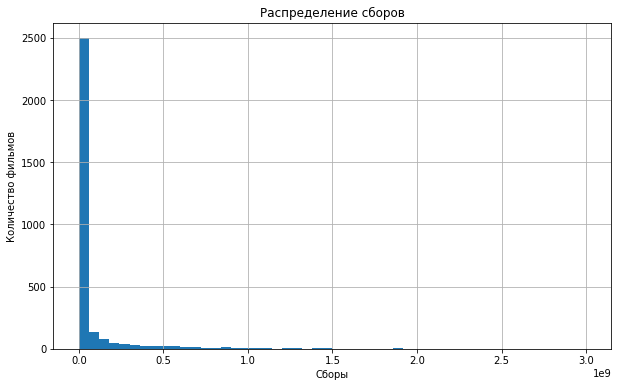

In [42]:
df['box_office'].hist(bins=50,range=(0,3000000000),figsize=(10,6))

plt.title('Распределение сборов')

plt.xlabel('Сборы')

plt.ylabel('Количество фильмов')

plt.show() ;

Посмотрим на данные в датафрейме, где box_office больше 50000 тысяч.

In [43]:
df.query('box_office > 50000')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,age_id
47,Асса,111005815,2015-04-23 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,С.Соловьев,Неизвестно,«16+» - для детей старше 16 лет,nan,nan,nan,NaN,6.00,"фэнтези,боевик","84,720.00",16.00
61,Аттестат зрелости,111005915,2015-04-23 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Т.Лукашевич,Неизвестно,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,6.90,драма,"67,500.00",12.00
98,Горе от ума.,111000915,2015-02-05 12:00:00,Художественный,Киностудия им. М.Горького,СССР,"С.Алексеев, В.Войтецкий",Неизвестно,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.00,драма,"197,464.50",6.00
107,Гарри Поттер и тайная комната /По роману Дж.К....,121026016,2016-09-23 12:00:00,Художественный,"Уорнер Бразерс, Хедэй Филмз/1492 Пикчерз",США,Крис Коламбус,Дейвид Хейман,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,8.00,"фэнтези,приключения,семейный","1,093,810.00",12.00
109,Гарри Поттер и философский камень /По роману Д...,121025916,2016-09-23 12:00:00,Художественный,"Уорнер Бразерс, Хэйдэй Филмз/1492 Пикчерз/Данк...",США,Крис Коламбус,Дейвид Хейман,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,8.20,"фэнтези,приключения,семейный","1,948,760.00",12.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6750,Союз спасения,111022019,2019-12-26 12:00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,"100,000,000.00","400,000,000.00","980,000,000.00",Фонд кино,6.00,"история,биография,драма","717,703,185.53",12.00
6752,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,"100,000,000.00",0.00,"190,000,000.00",Фонд кино,6.70,"мультфильм,приключения,семейный","501,069,235.00",6.00
6757,Реальная любовь в Нью-Йорке,121038219,2019-12-19 12:00:00,Художественный,"Креатив Энлэйнс, Арт, Копенгаген Филм, Дет Дан...",Дания - Канада - Швеция - Франция - Германия -...,Лоне Шерфиг,"Малене Бленков, Сандра Каннингэм",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,6.10,драма,"3,143,790.50",16.00
6758,Черное Рождество,121038319,2019-12-19 12:00:00,Художественный,"Юниверсал Пикчерз, Блюмхауз Продакшнз, Дивид/К...",США - Новая Зеландия,Софи Такал,Джесси Хендерсон,«18+» - запрещено для детей,nan,nan,nan,NaN,3.90,"ужасы,триллер,детектив","18,001,772.43",18.00



В столбце с количеством сборов много значений близких к нулю. Так как данных и так не очень много, фильмы с нулем или близким к нулю значениями выбиваются из общей картины. 

Удалим из таблицы фильма с выбивающимся значениями, обновим индексы

In [44]:
df = df.drop(labels= 6418,axis=0).reset_index(drop=True)

Посмотрим есть ли фильмы, у которых сумма возвратных и не возвратных средств превышает бюджет

In [45]:
budget_sep = pd.DataFrame(df[['budget','refundable_support','nonrefundable_support']])
budget_sep['sum_ref_nonref'] = budget_sep['refundable_support'] + budget_sep['nonrefundable_support']
budget_sep = budget_sep.query('sum_ref_nonref > budget')
budget_sep

,budget,refundable_support,nonrefundable_support,sum_ref_nonref
1871,0.00,0.00,"23,000,000.00","23,000,000.00"
1876,0.00,0.00,"75,000,000.00","75,000,000.00"
2253,0.00,"10,000,000.00","70,000,000.00","80,000,000.00"
2311,0.00,"20,000,000.00",0.00,"20,000,000.00"
2385,0.00,"60,000,000.00","100,000,000.00","160,000,000.00"
2447,0.00,0.00,"59,000,000.00","59,000,000.00"
2543,0.00,0.00,"35,000,000.00","35,000,000.00"
2623,0.00,0.00,"6,000,000.00","6,000,000.00"
2788,0.00,"19,000,000.00","51,000,000.00","70,000,000.00"
3278,0.00,0.00,"250,000,000.00","250,000,000.00"


Такие фильмы есть, но в них не указана сумма бюджета фильма. Скорее всего эти фильмы мы оставим для исследования, потому что в них указанны другие важные показатели для нашего исследования - суммы государственной возвратной и невозвратной поддержки. 

<a id="newcolumns"></a>
#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [46]:
df['year'] = df['show_start_date'].dt.year
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,age_id,year
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.20,"боевик,драма,мелодрама",nan,18.00,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Неизвестно,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.60,"драма,военный",nan,6.00,2016
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,18.00,2016
3,Остановился поезд,111013816,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,Неизвестно,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,7.70,драма,nan,6.00,2016
4,Любовь и голуби,111007013,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,Неизвестно,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,8.30,"мелодрама,комедия","2,700.00",12.00,2013


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

Для создания столбцов с именем и фамилией главного режиссера и основным жанром фильма создадим функцию, которая пройдется по элементам столбца, разделит их по запятой и выведет первый элемент списка. Проверим, что функция работает корректно

In [47]:
def sep_words(words):
    return (words.split(',')[0])
    
    
sep_words('драма,боевик,мелодрама')

'драма'

In [48]:
df['main_director'] = df['director'].apply(sep_words)

In [49]:
df['main_genre'] = df['genres'].apply(sep_words)

In [50]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,age_id,year,main_director,main_genre
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.20,"боевик,драма,мелодрама",nan,18.00,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Неизвестно,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.60,"драма,военный",nan,6.00,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,18.00,2016,Тимур Бекмамбетов,фантастика
3,Остановился поезд,111013816,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,Неизвестно,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,7.70,драма,nan,6.00,2016,В.Абдрашитов,драма
4,Любовь и голуби,111007013,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,Неизвестно,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,8.30,"мелодрама,комедия","2,700.00",12.00,2013,В.Меньшов,мелодрама


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

Посчитаем долю государственной поддержки на возвратной основе, невозвратной и общей основе от общего бюджета каждого фильма

In [51]:
ratio_budget_support = df.query('budget > 0').pivot_table(index='title',values=['budget','refundable_support','nonrefundable_support'],aggfunc='sum')
ratio_budget_support['nonrefundable %'] = ratio_budget_support['nonrefundable_support']/ratio_budget_support['budget']*100
ratio_budget_support['refundable %'] = ratio_budget_support['refundable_support']/ratio_budget_support['budget']*100
ratio_budget_support['total %'] = ratio_budget_support['nonrefundable %'] + ratio_budget_support['refundable %']

ratio_budget_support

,budget,nonrefundable_support,refundable_support,nonrefundable %,refundable %,total %
title,,,,,,
(Не)идеальный мужчина,"150,147,502.00","60,000,000.00","40,000,000.00",39.96,26.64,66.60
12 месяцев. Новая сказка,"90,120,000.00","5,000,000.00","15,000,000.00",5.55,16.64,22.19
28 Панфиловцев,"85,384,000.00","30,000,000.00",0.00,35.14,0.00,35.14
30 свиданий,"48,661,150.00","20,000,000.00","5,000,000.00",41.10,10.28,51.38
72 часа,"55,729,424.00","27,000,000.00","10,000,000.00",48.45,17.94,66.39
...,...,...,...,...,...,...
Я свободен,"46,154,000.00","30,000,000.00",0.00,65.00,0.00,65.00
Я умею вязать,"14,462,464.00","4,700,000.00",0.00,32.50,0.00,32.50
Я худею,"87,649,127.00","30,000,000.00",0.00,34.23,0.00,34.23


<a id="analys"></a>
### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

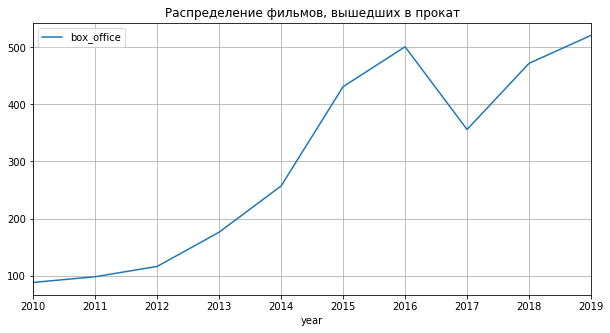

In [52]:
movies_inyear = df.pivot_table(index='year',values='box_office',aggfunc='count')
movies_inyear.plot(title='Распределение фильмов, вышедших в прокат',figsize=(10,5),grid=True);

Пик количества вышедших в прокат фильмов пришелся на 2016 и 2019 годы.

Посчитаем какую долю составляют фильмы с прокатной информацией в кинотеатрах от общей:

In [53]:
proportion = ((len(df['title'])) - (df['box_office'].isnull().sum()))/len(df['title'])*100
proportion

44.549483013293944

Прокатная информация есть у 44,6% фильмов из общих данных. Это может свидетельствовать о технической ошибке. Все фильмы вышли до 2019 года и скорее всего информация о них уже могла быть.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

,box_office
year,
2010,"2,374,340.00"
2011,"13,944,390.00"
2012,"6,465,111.00"
2013,"29,768,531.20"
2014,"7,372,598,571.60"
2015,"32,084,649,858.37"
2016,"43,731,444,689.34"
2017,"48,561,554,266.51"
2018,"47,970,993,536.28"


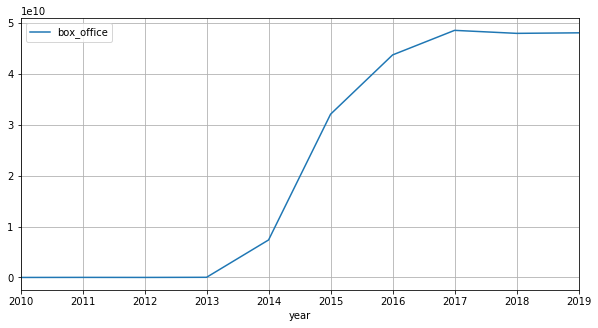

In [54]:
boxoffice_inyear = df.pivot_table(index='year',values='box_office',aggfunc='sum')
boxoffice_inyear.plot(grid=True,figsize=(10,5));
boxoffice_inyear

Сумма сборов была минимальной в 2010 году и начала существенно расти только с 2014 года. Максимальная сумма сборов за выбранный период была в 2018 году.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

,title
year,
2010,762
2011,477
2012,517
2013,590
2014,729
2015,661
2016,771
2017,498
2018,875


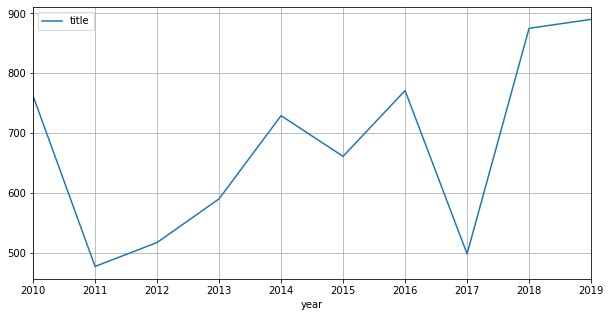

In [55]:
movies_year = df.pivot_table(index='year',values='title',aggfunc='count')
movies_year.plot(grid=True,figsize=(10,5));
movies_year

,mean,median
year,,
2010,"26,981.14","1,868.00"
2011,"142,289.69","3,042.50"
2012,"55,733.72","6,692.50"
2013,"169,139.38","3,565.00"
2014,"28,687,153.98","22,490.00"
2015,"74,442,343.06","4,327,265.70"
2016,"87,288,312.75","3,640,802.30"
2017,"136,408,860.30","10,177,833.50"
2018,"101,633,460.88","8,821,498.98"


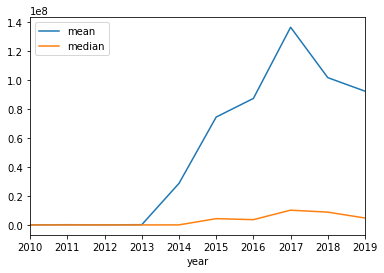

In [56]:
box_office_m = df.pivot_table(index='year',values='box_office',aggfunc=['mean','median'])
box_office_m.columns = ['mean','median']
display(box_office_m)

box_office_m.plot();

Можно сказать, что среднее и медиана начиная с 2013 года существенно различаются. Скорее всего причина в резком увеличении финансирования государства (boxoffice_inyear)

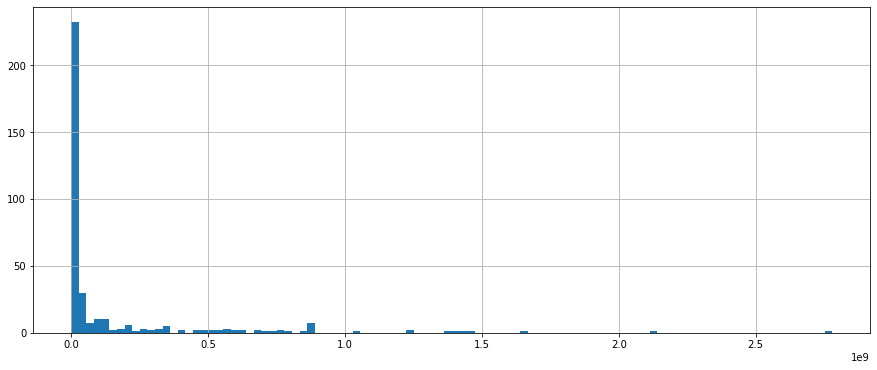

In [57]:
box_2017 = df.query('year == 2017 and box_office > 0')
box_2017['box_office'].hist(bins=100,figsize=(15,6));

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

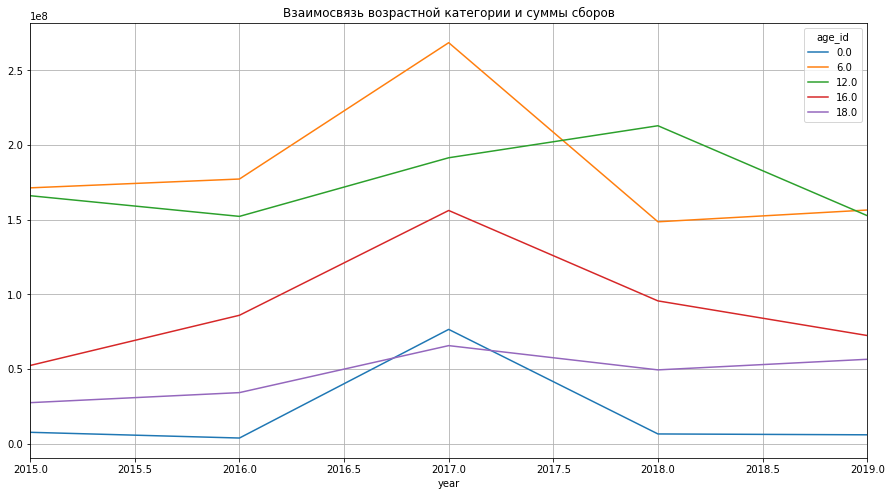

In [58]:
age_box = (df
           .query('2015 <= year <= 2019')
           .pivot_table(index='year',columns = 'age_id',values ='box_office'))

age_box.plot(figsize=(15,8),title='Взаимосвязь возрастной категории и суммы сборов',grid=True);

Исследуя взаимосвязь возрастной категории и суммы сборам по годам, можно сказать:
- возраст определенно точно влияет на суммы сборов в прокате,
- больше всего фильмов выпускают с возрастным ограничением 6+, у этой же возрастной категории в 2017 году были самые высокие сборы у фильма "Движение вверх",
- однако уже в 2018 году наибольшая сумма сборов в категории 12+ у фильма "Т-34",
- следом идут категории 12+ и 16+, с самыми большими сборами у "Т-34" и "Пираты Карибского моря: Мертвецы не рассказывают сказки" соответственно,
- самые не многочисленные категории фильмов 0+ и 18+, с (мульт)фильмами "Урфин Джюс и его деревянные солдаты" и "Оно" соотвественно.

In [59]:
most_pop_0 = df.query('age_id == 0 and year == 2017 and box_office > 200000000')
most_pop_6 = df.query('age_id == 6 and year == 2017 and box_office > 2000000000')
most_pop_12 = df.query('age_id == 12 and year == 2018 and box_office > 2000000000')
most_pop_16 = df.query('age_id == 16 and year == 2017 and box_office > 2000000000')
most_pop_18 = df.query('age_id == 18 and year == 2017 and box_office > 1000000000')
most_pop_18['title']

4815    Оно
Name: title, dtype: object

<a id="conclusion1"></a>
### Вывод

Основная и многочисленная категория фильмов в прокате - 6+. Это может быть связанно с тем, что основная часть посетителей это родители с детьми, либо школьники. По этой же причине категории 18+ и 0+ меньше пользуются популярностью.

<a id="support"></a>
### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку
На этом этапе нет конкретных инструкций и заданий — поищите
интересные закономерности в данных. Посмотрите, сколько выделяют
средств на поддержку кино. Проверьте, хорошо ли окупаются такие
фильмы, какой у них рейтинг.

Для анализа отечественных фильмов выведем новую таблицу с необходимыми для работы столбцами

In [60]:
support_movies = df[['title','puNumber','year','main_genre','age_id','box_office','ratings','production_country','budget','refundable_support','nonrefundable_support']]
support_movies.reset_index(drop=True).head()


,title,puNumber,year,main_genre,age_id,box_office,ratings,production_country,budget,refundable_support,nonrefundable_support
0,Открытый простор,221048915,2015,боевик,18.00,nan,7.20,США,nan,nan,nan
1,Особо важное задание,111013716,2016,драма,6.00,nan,6.60,СССР,nan,nan,nan
2,Особо опасен,221038416,2016,фантастика,18.00,nan,6.80,США,nan,nan,nan
3,Остановился поезд,111013816,2016,драма,6.00,nan,7.70,СССР,nan,nan,nan
4,Любовь и голуби,111007013,2013,мелодрама,12.00,"2,700.00",8.30,СССР,nan,nan,nan


In [61]:
support_movies = support_movies.query('budget > 0')
support_movies.reset_index(drop=True).head()

,title,puNumber,year,main_genre,age_id,box_office,ratings,production_country,budget,refundable_support,nonrefundable_support
0,Пока еще жива,111005313,2013,драма,16.00,"365,353.60",8.10,Россия,"79,411,900.00",0.00,"26,500,000.00"
1,Бесславные придурки,111003314,2014,Неизвестно,12.00,"28,140.00",nan,Россия,"37,142,857.00",0.00,"26,000,000.00"
2,Невидимки,111004213,2013,комедия,12.00,"19,957,031.50",5.30,Россия,"176,023,490.00",0.00,"107,847,945.00"
3,БЕРЦЫ,111004314,2014,драма,16.00,"55,917.50",4.20,Россия,"40,574,140.00",0.00,"28,000,000.00"
4,Братья Ч,111004414,2014,драма,16.00,"232,100.00",6.40,Россия,"40,015,122.00",0.00,"25,000,000.00"


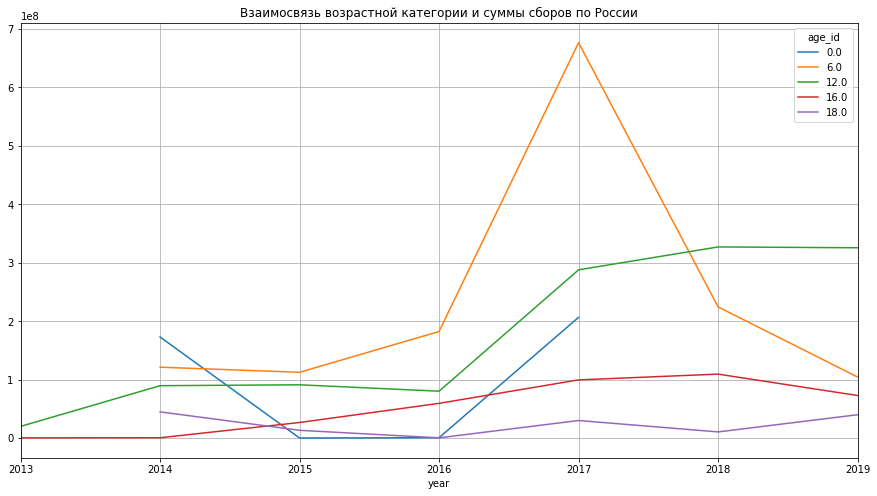

In [62]:
support_movies_plot = (support_movies
           .query('2013 <= year <= 2019')
           .pivot_table(index='year',columns = 'age_id',values ='box_office'))

support_movies_plot.plot(figsize=(15,8),title='Взаимосвязь возрастной категории и суммы сборов по России',grid=True);

Наибольшая часть фильмов так же как и в общей картине с ограничением 6+. В 2015 году вперед по сборам выбывается фильм категории 12+ - "Батальонъ". В 2017 году наибольшая сумма сборов у фильма "Движение вверх".

In [63]:
most_pop_0 = support_movies.query('age_id == 0 and year == 2017 and box_office > 40000000')
most_pop_6 = support_movies.query('age_id == 6 and year == 2017 and box_office > 900000000')
most_pop_12 = support_movies.query('age_id == 12 and year == 2015 and box_office > 400000000')
most_pop_12['title']

1907               Батальонъ
1944    Битва за Севастополь
Name: title, dtype: object

Посмотрим как распределялись объемы финансирвоания по годам

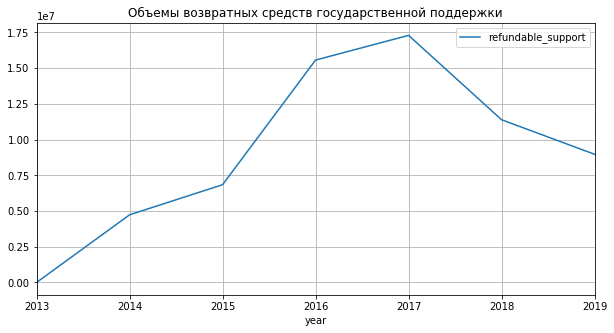

In [64]:
ref_movies = support_movies.pivot_table(index='year',values='refundable_support')
ref_movies.plot(title='Объемы возвратных средств государственной поддержки',grid=True,figsize=(10,5));

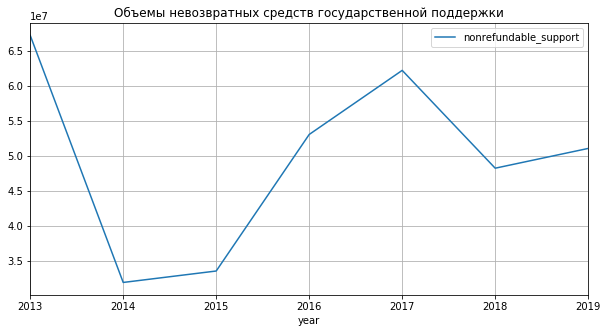

In [65]:
nonref_movies = support_movies.pivot_table(index='year',values='nonrefundable_support')
nonref_movies.plot(title='Объемы невозвратных средств государственной поддержки',grid=True,figsize=(10,5));

Наибольший объем возвратных средств был выделен в период с 2016 по 2018 годы. Невозвратные средства выделялись в 2013 году, и в 2017.

In [66]:
support_box = support_movies.pivot_table(index='year',values=['budget','box_office'],aggfunc='sum')
support_box

,box_office,budget
year,,
2013,"20,322,385.10","255,435,390.00"
2014,"1,007,188,150.50","1,279,484,783.00"
2015,"4,815,747,420.83","7,309,669,207.00"
2016,"4,957,724,366.67","7,228,942,748.00"
2017,"10,759,515,337.20","6,972,172,568.00"
2018,"9,517,657,281.13","6,651,694,634.00"
2019,"7,922,983,966.53","9,170,792,306.00"


Самыми прибыльными годами по сборам стали 2017 и 2018 года.

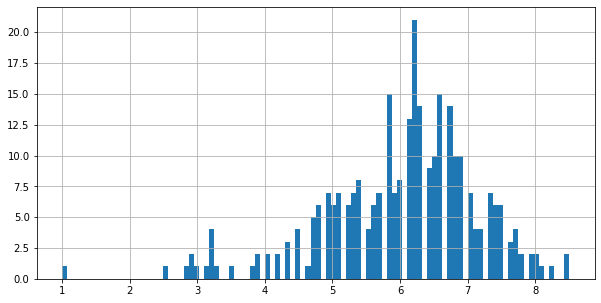

In [67]:
support_movies['ratings'].hist(bins=100,figsize=(10,5));

В среднем фильмы получившие государственную поддержку получают оценки от 5 до 8 баллов из 10. Но есть фильмы с меньшими оценками. Посмотрим сколько на них было потрачено и окупили ли они себя. Отсортируем таблицу по выделенному бюджету и посмотрим первые 15, окупились они или нет.

In [68]:
less_pop = (support_movies
                .query('ratings < 4')
                .pivot_table(index='title',values=['budget','box_office','ratings'])
                .sort_values(by='budget',ascending=False))
less_pop['payback'] = less_pop['box_office'] - less_pop['budget']
less_pop.head(15)

,box_office,budget,ratings,payback
title,,,,
Гурвинек. Волшебная игра,"30,325,879.15","385,000,000.00",3.50,"-354,674,120.85"
Защитники,"262,040,254.00","323,232,109.00",3.00,"-61,191,855.00"
Крым (2017),"342,898,736.00","222,513,841.00",2.90,"120,384,895.00"
Ночные стражи,"29,822,146.51","210,405,981.00",3.20,"-180,583,834.49"
На Париж,"9,197,107.51","165,222,908.00",3.20,"-156,025,800.49"
Крымский мост. Сделано с любовью,"70,798,668.90","154,245,687.00",2.50,"-83,447,018.10"
Бременские разбойники,"34,899,699.18","120,000,000.00",3.20,"-85,100,300.82"
12 месяцев. Новая сказка,"32,244,810.00","90,120,000.00",3.80,"-57,875,190.00"
Неуловимые: последний герой,"11,034,433.20","73,379,554.00",3.30,"-62,345,120.80"


Основная картина печальна, лишь некоторые фильмы с рейтингом менее 4 окупились:
- окупились фильмы: "Крым(2017)" и "Женщины против мужчин: Крымские каникулы",
- самый дорогой фильм(мультфильм) по финансированию государства "Гурвинек. Волшебная игра" в прокате провалился с треском и собрал в прокате сумму почти в 13 раз меньшую, чем на него выделялось.

In [69]:
much_pop = (support_movies
                .query('ratings > 7')
                .pivot_table(index='title',values=['budget','box_office','ratings'])
                .sort_values(by='budget',ascending=False))
much_pop['payback'] = much_pop['box_office'] - much_pop['budget']
much_pop.head(15)

,box_office,budget,ratings,payback
title,,,,
Матильда,"511,775,548.00","1,032,905,957.00",7.70,"-521,130,409.00"
Экипаж .,"1,402,255,390.00","635,283,867.00",7.60,"766,971,523.00"
Движение вверх,"2,779,686,144.00","590,192,191.00",7.50,"2,189,493,953.00"
Время первых (2017),"544,332,260.00","528,441,977.00",7.50,"15,890,283.00"
Салют-7,"752,679,777.00","493,733,957.00",7.40,"258,945,820.00"
Батальонъ,"451,812,221.70","436,437,176.00",7.10,"15,375,045.70"
БОЛЬШОЙ,"228,578,204.00","320,000,000.00",8.50,"-91,421,796.00"
Фиксики против кработов,"387,590,521.72","270,000,000.00",7.50,"117,590,521.72"
Герой,"172,871,342.04","250,000,000.00",7.90,"-77,128,657.96"


Та же ситуация, но уже по наиболее популярным фильмам с рейтингом выше 7.
Здесь уже картина чуть лучше:

- окупились 8 фильмов из 15, самый окупаемый фильм в нашем рейтинге "Движение вверх", кассовые сборы почти в 5 раз превысили бюджет фильма,
- один из самых дорогих фильмов с наивысшим рейтингом 8,5 "БОЛЬШОЙ" не окупился и собрал на 91 миллион меньше бюджета фильма.


In [70]:
support_movies.pivot_table(index='year',values='ratings')

,ratings
year,
2013,6.70
2014,5.96
2015,6.06
2016,5.69
2017,6.05
2018,6.04
2019,6.18


В среднем оценка фильмов которым была выделена государственная помощь на той или иной основе не очень высокая.

<a id="conclusion2"></a>
### Шаг 5. Напишите общий вывод

Задачей исследования было изучить рынок российского кинопроката и выявить текущие тренды. 

Уделить внимание фильмам, которые получили государственную поддержку. 

Ответить на вопрос, насколько такие фильмы интересны зрителю.
Отвечая на поставленную задачу можно сказать, что: 
- Предобработка данных выявила такие проблемы как нарушение некоторых типов данных, которые были приведены к нужным. Выбивающиеся значения с % в столбце с рейтингом фильма.  Заполнили пропуски в столбцах с режиссером и жанром для дальнейшей работы с ними, остальные столбцы оставили в их первоначальном виде.

- Проведя исследовательский анализ данных обнаружили, что меньше всего фильмов вышло в 2017 году, 2010 и 2019 стали годами с наибольшим количеством фильмов, вышедших в прокат.  Больше всего инвестировано денег в кино было в 2018 году. Выяснили, что основная часть фильмов с категорией 6+, количество фильмов с возрастным ограничением 18+ и 0+ существенно меньше. 

- Исследуя рынок фильмов, выпущенные с помощью государственной поддержки можно однозначно сказать, что такие фильмы не сильно привлекают россиян. Фильмы чаще всего не окупаются (за редким исключением), у них в среднем невысокие оценки. Оценивая суммы, выделенные на съемку такого кино, ожидается, что рейтинги и сборы у них могут быть на порядок больше.